In [1]:
from scipy.signal import savgol_filter

In [2]:

import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(gdd);
reload(anaz);
from sqlalchemy.engine.result import RowProxy
from numpy.linalg import norm
import seaborn as sns
from scipy.stats import zscore

import pandas as pd

from IPython.display import display

In [129]:
data = gdd.get_db_data()
pars = data.get_participants(True)

cohes ={a[1]: str(a[2])[:4] for a in pars}

In [4]:
pars_tuples={}
for g, p, _ in pars:
    pars_tuples[g] = pars_tuples.get(g,[])  + [p]
pars_tuples

{1001: [101, 102, 103],
 1003: [108, 109],
 1004: [110, 111, 112],
 1006: [116, 117, 118],
 1007: [119, 120, 121],
 1008: [122, 123, 124],
 1009: [125, 126, 127],
 1010: [128, 129, 130],
 1011: [131, 132, 133],
 1012: [134, 135, 136],
 1013: [137, 138, 139],
 1014: [140, 141, 142],
 1015: [144, 145],
 1016: [146, 147, 148],
 1017: [149, 151],
 1019: [155, 156, 157],
 1020: [158, 159, 160],
 1022: [164, 165, 166],
 1023: [167, 168, 169],
 1024: [170, 171, 172],
 1025: [173, 174, 175],
 1026: [176, 177, 178],
 1027: [179, 180, 181],
 1028: [182, 183],
 1029: [185, 186, 187],
 1030: [188, 189, 190],
 1031: [191, 192, 193],
 1032: [194, 195, 196],
 1033: [200, 201, 202],
 1034: [203, 204, 205],
 1035: [206, 207, 208],
 1036: [209, 210, 211],
 1037: [212, 213, 214],
 1038: [215, 216, 217],
 1039: [218, 219, 220],
 1040: [221, 222, 223],
 1041: [224, 225, 226],
 1042: [227, 228, 229],
 1043: [230, 231, 232],
 1044: [233, 234, 235],
 1045: [236, 237, 238],
 1046: [239, 240, 241],
 1047: [242,

In [5]:
def yield_group_signals(group_id,series_type):
    return data.get_signal_by_series_type_and_interp_type(pars_tuples[group_id],series_type,3)


In [91]:
gm_orth = lambda v,u: v-u* (v@u)/(u@u) 


def sg_components(group_id, f1_length, f2_length):
    Raw = "Raw_{}".format
    SG = "Sg_{}".format
    Resid = "resid_{}".format
    RMS = "rms_{}".format
    RMSO = "rmso_{}".format
    signals = {}
    
    for par_id, sig in yield_group_signals(group_id, 2):
        
        y = zscore(sig[:,1])
        sg = savgol_filter(y,f1_length,1)
        resid = y - sg
        rms = np.sqrt(savgol_filter(resid**2,f2_length,1,mode="mirror"))
        rmso = gm_orth(rms,sg)
        signals.update({
            Raw(par_id): y,
            SG(par_id): sg,
            Resid(par_id): resid,
            RMS(par_id): rms,
            RMSO(par_id): rmso
        })
    return signals

In [92]:
sig1 = sg_components(1001,21,11)

In [85]:
sg = sig1['Sg_101'] 
rms = sig1['rms_101']
rmso = sig1['rmso_101']
#sg = sg-sg.mean()
rm = rm
norm = lambda x: np.sqrt(np.dot(x,x))
norm2 = lambda x: np.dot(x,x)

gm_orth = lambda v,u: v-u* (v@u)/(u@u) 

ort = rm - sg*rm.dot(sg)/norm2(sg)

print('norm: {:.3f} {}'.format(norm(sg), norm(sg/norm(sg)))) 

sgc = rm.dot(sg/norm(sg))
print(norm(rm), rm.dot(sg/norm(sg)), rm.dot(sg)/(norm(rm)*norm(sg)), ort.dot(sg), sg @ gm_orth(rm, sg))


norm: 15.598 1.0
13.57699139554126 -2.5248076853901127 -0.18596223653933153 2.4424906541753444e-15 2.4424906541753444e-15


In [93]:
pd.DataFrame(sig1).corr()

,Raw_101,Sg_101,resid_101,rms_101,rmso_101,Raw_102,Sg_102,resid_102,rms_102,rmso_102,Raw_103,Sg_103,resid_103,rms_103,rmso_103
Raw_101,1.000000,0.777902,0.692463,-0.306588,0.008560,-0.009357,-0.130436,0.061460,-0.465733,-0.462052,0.402170,0.424779,0.203074,-0.007876,-0.073265
Sg_101,0.777902,1.000000,0.085318,-0.383972,0.021994,-0.092291,-0.239421,0.026715,-0.571569,-0.529311,0.343575,0.458673,0.101421,-0.097049,-0.168871
resid_101,0.692463,0.085318,1.000000,-0.045279,-0.011679,0.091124,0.068065,0.066778,-0.082234,-0.124914,0.243212,0.146914,0.205547,0.098934,0.077715
rms_101,-0.306588,-0.383972,-0.045279,1.000000,0.914676,0.269549,0.428159,0.072007,0.622476,0.496823,-0.200944,-0.352901,0.004363,0.282219,0.340328
rmso_101,0.008560,0.021994,-0.011679,0.914676,1.000000,0.251456,0.358788,0.089660,0.423790,0.306237,-0.067177,-0.181326,0.049121,0.263092,0.294571
Raw_102,-0.009357,-0.092291,0.091124,0.269549,0.251456,1.000000,0.488726,0.875723,0.272858,0.074586,0.224920,0.043370,0.259679,0.226221,0.222661
Sg_102,-0.130436,-0.239421,0.068065,0.428159,0.358788,0.488726,1.000000,0.006764,0.460124,0.042129,0.071602,0.012911,0.083342,0.346877,0.349655
resid_102,0.061460,0.026715,0.066778,0.072007,0.089660,0.875723,0.006764,1.000000,0.058111,0.062175,0.218176,0.042565,0.251519,0.067327,0.061710
rms_102,-0.465733,-0.571569,-0.082234,0.622476,0.423790,0.272858,0.460124,0.058111,1.000000,0.906451,-0.305144,-0.480644,-0.034945,0.394698,0.473983
rmso_102,-0.462052,-0.529311,-0.124914,0.496823,0.306237,0.074586,0.042129,0.062175,0.906451,1.000000,-0.377439,-0.547014,-0.078966,0.279164,0.367063


In [163]:
def group_decomp_signal_correlations(group_ids,f1_length, f2_length):
    cr = {}
    for gid in group_ids:
        sig = sg_components(gid,f1_length, f2_length)
        df = pd.DataFrame(sig)
        df=df[sorted(df.columns)]
        cr[gid] = df.corr()
    return cr

def get_diags(mat):
    return np.concatenate([np.diag(mat,k) for k in range(1,mat.shape[0])])

def summarize_raw_vs_sg_correl(group_ids,f1_length, f2_length):
    cr_dict = group_decomp_signal_correlations(group_ids, f1_length, f2_length)
    for gid, cr in cr_dict.items():
        if len(cr) == 15:
            raw_cc = get_diags(cr.iloc[0:3,0:3].values)  
            sg_cc = get_diags(cr.iloc[3:6,3:6].values)  #[cr.iloc[3,4], cr.iloc[4,5], cr.iloc[3,5]]
            rms_cc = get_diags(cr.iloc[9:12,9:12].values)  #[cr.iloc[9,10], cr.iloc[10,11], cr.iloc[9,11]]
            resid_cc = get_diags(cr.iloc[6:9,6:9].values)  #[cr.iloc[6,7], cr.iloc[7,8], cr.iloc[6,8]]
            rmso_cc = get_diags(cr.iloc[12:15,12:15].values)  
            yield pd.DataFrame({
                'group_id':gid, 
                'raw_cc': raw_cc, 
                'sg_cc': sg_cc, 
                'rms_cc': rms_cc, 
                'resid_cc': resid_cc,
                'rmso_cc': rmso_cc
            })
    

def all_sig_correls(group_ids,f1_length, f2_length):
    sig = {gid: sg_components(gid, f1_length, f2_length) for gid in group_ids}
    sig_len = {gid: next(iter(d.values())).shape[0] for gid, d in sig.items() }
    min_sig_len = min(sig_len.values())

    sig_sg = [{(gid,sigid): y[:min_sig_len] for sigid, y in sig[gid].items() if sigid.startswith("Sg_")} for gid in sig.keys()]
    
    d = {}
    for v in sig_sg:
        d.update(v)
    
    
    dfc = pd.DataFrame(d).corr()
    return dfc

def extract_cross_group(dfc):
    for i, k1 in enumerate(dfc.columns):
        for k2 in dfc.columns[i+1:]:
            if k1[0] != k2[0]:
                yield k1, k2, dfc[k1][k2]


In [164]:
dfc = all_sig_correls(gids, 21,11)

In [169]:
crossgroup = list(extract_cross_group(dfc))
crossgroup_values = [v[2] for v in crossgroup]

<AxesSubplot:xlabel='sg_cc'>

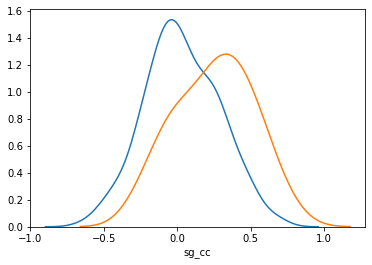

In [170]:
sns.distplot(crossgroup_values,hist=False)
sns.distplot(summarized.sg_cc,hist=False)


In [180]:
m = lambda v: (np.mean(v), np.std(v), len(v))
print("cross group: {:.4f} \u00b1 {:.2f} [N={}]".format(*m(crossgroup_values)))
print("within groups: {:.4f} \u00b1 {:.2f} [N={}]".format(*m(summarized.sg_cc)))


cross group: 0.0341 ± 0.25 [N=405]
within groups: 0.2513 ± 0.26 [N=30]


In [177]:
m(crossgroup_values)

(0.034052025591949545, 0.25352828555118784, 405)

In [155]:
l = [{(gid,sigid): y for sigid, y in sig[gid].items() if sigid.startswith("Sg_")} for gid in sig.keys()]
    
d = {}
for v in l:
    d.update(v)

d
    #[(gid,sigid, y) for parid, y in sig[gid].items() for gid in sig.keys()]

#[(gid,sigid)  for gid in sig.keys()]

{(1001,
  'Sg_101'): array([-1.09251868, -0.97546284, -0.85840699, -0.74135115, -0.6242953 ,
        -0.50723946, -0.39018361, -0.27312777, -0.15607192, -0.03901608,
         0.07803977,  0.18776761,  0.30867488,  0.41605877,  0.4836246 ,
         0.51285469,  0.51202226,  0.47918496,  0.42680008,  0.37300591,
         0.31733511,  0.27172653,  0.23855334,  0.18534333,  0.12494081,
         0.09366614,  0.0877953 ,  0.11269528,  0.16305749,  0.23712944,
         0.32997495,  0.41132704,  0.48104698,  0.51899571,  0.53231464,
         0.57346167,  0.63294414,  0.68856382,  0.74005055,  0.78795927,
         0.82543337,  0.84021271,  0.83943139,  0.82606134,  0.83578037,
         0.88568985,  0.9226455 ,  0.93544599,  0.93213816,  0.91805982,
         0.90969898,  0.91502947,  0.92498216,  0.91929387,  0.92328808,
         0.93710356,  0.91260519,  0.84904818,  0.76584137,  0.66884099,
         0.58333404,  0.53070819,  0.52140539,  0.55059166,  0.58884708,
         0.61450647,  0.6219034

In [151]:
gid

'1011'

In [149]:
sig.keys()

dict_keys([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013])

In [147]:
list(sig.keys())

[1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013]

In [144]:
type(list(sig.keys())[0])

int

In [135]:
sig_len

{1001: 464,
 1004: 493,
 1006: 471,
 1007: 443,
 1008: 612,
 1009: 469,
 1010: 567,
 1011: 442,
 1012: 566,
 1013: 444}

In [34]:
clean_cr.shape

(12, 12)

In [41]:
get_diags(cr.iloc[:3,:3].values)

array([-0.00935665,  0.22492034,  0.40217037])

In [95]:
#gids = [k for k, v in pars_tuples.items() if len(v)==3][:10]
gids

[1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013]

In [98]:
summarized = pd.concat(list(summarize_raw_vs_sg_correl(gids, 21, 11)))

In [99]:
summarized.head()

,group_id,raw_cc,sg_cc,rms_cc,resid_cc,rmso_cc
0,1001,-0.009357,-0.239421,0.622476,0.066778,0.306237
1,1001,0.224920,0.012911,0.394698,0.251519,0.367063
2,1001,0.402170,0.458673,0.282219,0.205547,0.294571
0,1004,0.045329,0.193366,0.075958,-0.030403,-0.052323
1,1004,0.146788,0.336191,0.396081,-0.040447,0.179166


In [104]:
summarized['group_id']= summarized.group_id.astype(str)

In [105]:
# This produces a cryptic error
# ValueError: zero-size array to reduction operation minimum which has no identity
sns.scatterplot(x='raw_cc',y='sg_cc', hue='group_id', data=summarized) #,style='group_id',data=summarized.iloc[:-6,:])

<AxesSubplot:xlabel='raw_cc', ylabel='sg_cc'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 1 Axes>

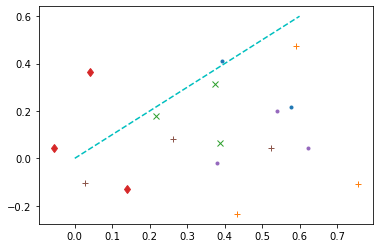

In [110]:
for (gid, df),p in zip(summarized.iloc[7:,:].groupby('group_id'),'.+xd.+'):
    plt.plot(df.sg_cc, df.rmso_cc,p)

plt.plot([0,0.6],[0,0.6],'c--');

<AxesSubplot:xlabel='rmso_cc'>

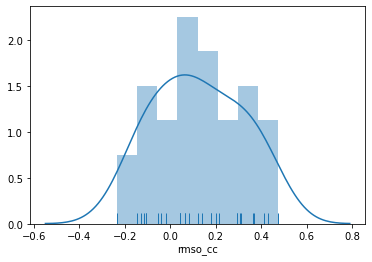

In [115]:
sns.distplot(summarized.rmso_cc,bins=8,rug=True)

<AxesSubplot:xlabel='rms_cc'>

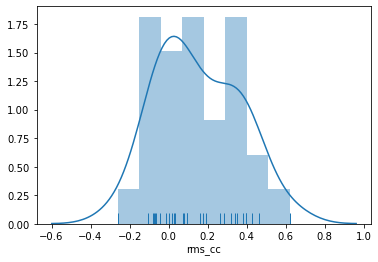

In [116]:
sns.distplot(summarized.rms_cc,bins=8,rug=True)

<AxesSubplot:xlabel='raw_cc'>

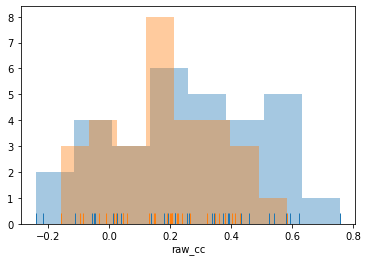

In [120]:
sns.distplot(summarized.sg_cc,bins=8,rug=True,kde=False)
sns.distplot(summarized.raw_cc,bins=8,rug=True,kde=False)

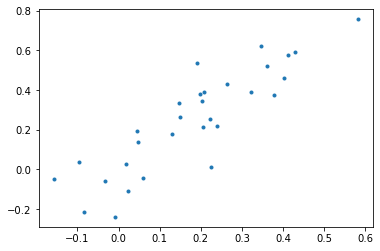

In [122]:
plt.plot(summarized.raw_cc, summarized.sg_cc,'.')

In [125]:
from scipy.stats import linregress
linregress(summarized.raw_cc, summarized.sg_cc)

LinregressResult(slope=1.2866882683908878, intercept=0.018541140373500936, rvalue=0.8744823972176137, pvalue=2.6951595529528935e-10, stderr=0.1348764898798694)

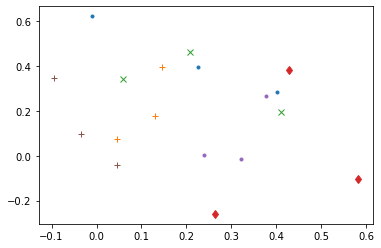

In [23]:
for (gid, df),p in zip(summarized.groupby('group_id'),'.+xd.+'):
    plt.plot(df.raw_cc, df.rms_cc,p)

In [33]:
k = 3
gr = "{:.3f}".format
sig = sg_components(1001,21,11)

df = pd.DataFrame(sig)
df=df[sorted(df.columns)]
cr = df.corr()

clean_cr = cr.copy()
clean_cr = clean_cr.applymap(gr)
for i in range(len(cr)):
    clean_cr.iloc[i,i//k*k+k:]= ""
    clean_cr.iloc[i//k*k+k:,i]= ""

clean_cr.iloc[k:k*2, k*3: k*4] = cr.iloc[k:k*2, k*3: k*4].applymap(gr)

display(clean_cr)

display(cr.iloc[k:k*2,k*2:k*3].applymap(gr))

,Raw_101,Raw_102,Raw_103,Sg_101,Sg_102,Sg_103,resid_101,resid_102,resid_103,rms_101,rms_102,rms_103
Raw_101,1.000,-0.009,0.402,,,,,,,,,
Raw_102,-0.009,1.000,0.225,,,,,,,,,
Raw_103,0.402,0.225,1.000,,,,,,,,,
Sg_101,,,,1.000,-0.239,0.459,,,,-0.384,-0.572,-0.097
Sg_102,,,,-0.239,1.000,0.013,,,,0.428,0.460,0.347
Sg_103,,,,0.459,0.013,1.000,,,,-0.353,-0.481,0.165
resid_101,,,,,,,1.000,0.067,0.206,,,
resid_102,,,,,,,0.067,1.000,0.252,,,
resid_103,,,,,,,0.206,0.252,1.000,,,
rms_101,,,,,,,,,,1.000,0.622,0.282


,resid_101,resid_102,resid_103
Sg_101,0.085,0.027,0.101
Sg_102,0.068,0.007,0.083
Sg_103,0.147,0.043,0.082


In [64]:
k = 3
sig = sg_components(1001,51,21)

df = pd.DataFrame(sig)
df=df[sorted(df.columns)]
cr = df.corr()

clean_cr = cr.copy()
clean_cr = clean_cr.applymap("{:.3f}".format)
for i in range(len(cr)):
    clean_cr.iloc[i,i//k*k+k:]= ""
    clean_cr.iloc[i//k*k+k:,i]= ""

clean_cr.iloc[k:k*2, k*3: k*4] = cr.iloc[k:k*2, k*3: k*4].applymap("{:.3f}".format)

display(clean_cr)

,Raw_101,Raw_102,Raw_103,Sg_101,Sg_102,Sg_103,resid_101,resid_102,resid_103,rms_101,rms_102,rms_103
Raw_101,1.000,-0.009,0.402,,,,,,,,,
Raw_102,-0.009,1.000,0.225,,,,,,,,,
Raw_103,0.402,0.225,1.000,,,,,,,,,
Sg_101,,,,1.000,-0.253,0.338,,,,-0.483,-0.544,-0.332
Sg_102,,,,-0.253,1.000,-0.167,,,,0.661,0.613,0.614
Sg_103,,,,0.338,-0.167,1.000,,,,-0.191,-0.315,0.083
resid_101,,,,,,,1.000,0.173,0.449,,,
resid_102,,,,,,,0.173,1.000,0.338,,,
resid_103,,,,,,,0.449,0.338,1.000,,,
rms_101,,,,,,,,,,1.000,0.761,0.600


In [56]:
sig = sg_components(1003,21,11)

df = pd.DataFrame(sig)
df=df[sorted(df.columns)]
cr = df.corr()

clean_cr = cr.copy()
clean_cr = clean_cr.applymap("{:.3f}".format)
for i in range(len(cr)):
    clean_cr.iloc[i,i//2*2+2:]= ""
    clean_cr.iloc[i//2*2+2:,i]= ""
clean_cr


,raw_108,raw_109,resid_108,resid_109,rms_108,rms_109,sg_108,sg_109
raw_108,1.000,0.167,,,,,,
raw_109,0.167,1.000,,,,,,
resid_108,,,1.000,0.136,,,,
resid_109,,,0.136,1.000,,,,
rms_108,,,,,1.000,0.204,,
rms_109,,,,,0.204,1.000,,
sg_108,,,,,,,1.000,0.227
sg_109,,,,,,,0.227,1.000


In [57]:
sig = sg_components(1004,21,11)

df = pd.DataFrame(sig)
df=df[sorted(df.columns)]
cr = df.corr()

clean_cr = cr.copy()
clean_cr = clean_cr.applymap("{:.3f}".format)
for i in range(len(cr)):
    clean_cr.iloc[i,i//3*3+3:]= ""
    clean_cr.iloc[i//3*3+3:,i]= ""
clean_cr

,raw_110,raw_111,raw_112,resid_110,resid_111,resid_112,rms_110,rms_111,rms_112,sg_110,sg_111,sg_112
raw_110,1.000,0.045,0.130,,,,,,,,,
raw_111,0.045,1.000,0.147,,,,,,,,,
raw_112,0.130,0.147,1.000,,,,,,,,,
resid_110,,,,1.000,-0.030,0.037,,,,,,
resid_111,,,,-0.030,1.000,-0.040,,,,,,
resid_112,,,,0.037,-0.040,1.000,,,,,,
rms_110,,,,,,,1.000,0.076,0.176,,,
rms_111,,,,,,,0.076,1.000,0.396,,,
rms_112,,,,,,,0.176,0.396,1.000,,,
sg_110,,,,,,,,,,1.000,0.193,0.180


In [60]:
sig = sg_components(1006,21,11)

df = pd.DataFrame(sig)
df=df[sorted(df.columns)]
cr = df.corr()

clean_cr = cr.copy()
clean_cr = clean_cr.applymap("{:.3f}".format)
for i in range(len(cr)):
    clean_cr.iloc[i,i//3*3+3:]= ""
    clean_cr.iloc[i//3*3+3:,i]= ""
clean_cr

,raw_116,raw_117,raw_118,resid_116,resid_117,resid_118,rms_116,rms_117,rms_118,sg_116,sg_117,sg_118
raw_116,1.000,0.058,0.411,,,,,,,,,
raw_117,0.058,1.000,0.207,,,,,,,,,
raw_118,0.411,0.207,1.000,,,,,,,,,
resid_116,,,,1.000,0.238,0.098,,,,,,
resid_117,,,,0.238,1.000,0.027,,,,,,
resid_118,,,,0.098,0.027,1.000,,,,,,
rms_116,,,,,,,1.000,0.340,0.194,,,
rms_117,,,,,,,0.340,1.000,0.463,,,
rms_118,,,,,,,0.194,0.463,1.000,,,
sg_116,,,,,,,,,,1.000,-0.045,0.578


In [181]:
group

'1011'